In [1]:
%matplotlib inline

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import random

In [ ]:
exp_array1 = np.random.exponential(size=1000)
exp_array2 = np.random.exponential(size=100)

In [ ]:
plt.figure()
plt.hist(exp_array2, 20)

In [ ]:
test = []
null = []
for i in exp_array2:
#     null.append(np.random.choice(exp_array1))
    null.append(np.median(exp_array1))
    test.append(i)

In [ ]:
print(len(test), len(null))
print(np.mean(test), np.mean(null))
print(stats.wilcoxon(test, null))

# Rinse and repeat to check out p-val distributions

In [ ]:
pvals = []
deltas = []
for i in range(2000):
    test_array = np.random.exponential(size=100)
    test = []
    null = []
    for j in test_array:
        null_array = np.random.exponential(size=100)
        test.append(j)
        null.append(np.random.choice(null_array))
    a, b = stats.wilcoxon(test, null)
    pvals.append(b)
    deltas.append(np.mean(np.array(test)-np.array(null)))
    
plt.figure()
plt.hist(pvals, 20);
plt.figure()
plt.hist(deltas, 20);
plt.axvline(np.mean(deltas), c='r')

In [ ]:
pvals = []
deltas = []
for i in range(2000):
    test_array = np.random.exponential(size=100)
    test = []
    null = []
    for j in test_array:
        null_array = np.random.exponential(size=10)
        test.append(j)
        null.append(np.mean(null_array))
    a, b = stats.wilcoxon(test, null)
    pvals.append(b)
    deltas.append(np.mean(np.array(test)-np.array(null)))

plt.figure()
plt.hist(pvals, 20);

plt.figure()
plt.hist(deltas, 20);
plt.axvline(np.mean(deltas), c='r')

In [ ]:
pvals = []
deltas = []
for i in range(2000):
    test_array = np.random.exponential(size=100)
    test = []
    null = []
    for j in test_array:
        null_array = np.random.exponential(size=10)
        test.append(j)
        null.append(np.median(null_array))
    a, b = stats.wilcoxon(test, null)
    pvals.append(b)
    deltas.append(np.mean(np.array(test)-np.array(null)))


plt.figure()
plt.hist(pvals, 20);

plt.figure()
plt.hist(deltas, 20);
plt.axvline(np.mean(deltas), c='r')

In [ ]:
test_array = np.random.exponential(size=100)
test = []
null_dict = {}
for j in test_array:
    test.append(j)
    null_array = np.random.exponential(size=10)
    for k in range(1000):
        try:
            null_dict[k].append(np.random.choice(null_array))
        except KeyError:
            null_dict[k] = [np.random.choice(null_array)]

In [ ]:
pvals = []
for key in null_dict.keys():
    stat, p = stats.wilcoxon(test, null_dict[key])
    pvals.append(p)
plt.figure()
plt.hist(pvals, 20);

In [ ]:
def permutation_test(list1, list2):
    actual = np.mean(list1)/np.mean(list2)
    expected = []
    for i in range(1000):
        combined = np.array(list1+list2)
        np.random.shuffle(combined)
        temp1 = combined[:len(list1)]
        temp2 = combined[len(list1):]
        expected.append(np.mean(temp1)/np.mean(temp2))
    return actual, expected

In [ ]:
pvals = []
deltas = []
for i in range(200):
    print(i)
    test_array = np.random.exponential(size=100)
    test = []
    null = []
    for j in test_array:
        null_array = np.random.exponential(size=100)
        test.append(j)
        null.append(np.random.choice(null_array))
    actual, expected = permutation_test(test, null)
    pvals.append(len([rando for rando in expected if rando > actual])/1000)
    deltas.append(np.mean(np.array(test)-np.array(null)))

plt.figure()
plt.hist(pvals, 20);

plt.figure()
plt.hist(deltas, 20);
plt.axvline(np.mean(deltas), c='r')

In [ ]:
[np.random.exponential(2)] + list(np.random.exponential(2, 3))

In [ ]:
p_vals_mean = []
p_vals_median = []
p_vals_max = []


#####Have to keep these numbers low because there are a lot of for loops here
randomizations = 10 #####This is the number of times I'm repeating the entire analysis
sampling_randomizations = 10 ####This is the "first" bootstrap number. I.e. how many times to sample category "a" and "b"
second_bootstrap_randomizations = 100 ####This is the number of times I repeat the above sampling using shuffled data as a null

for randomization in range(randomizations):
    print(randomization)
    ##########################
    ####First simulate 1000 "genes"
    values_dictionary = {}
    for i in range(1000): 
        ##########################
        ###Each "gene" is between 2 and 5 randomly drawn exponential values
        values_dictionary[i] = list(np.random.exponential(1, size=int(np.random.uniform(2, 5))))
        ###Uncomment below (and comment above) to simulate a positive control 
#         values_dictionary[i] = [np.random.exponential(1.1)] + list(np.random.exponential(1, size=int(np.random.uniform(2, 5))))
    ##########################
    ####Normalize each entry
    for i,j in values_dictionary.items():
        meany = np.mean(j)
        values_dictionary[i] = j/meany
        
        
    ##########################
    ####Statistical tests
    ratios = []
    p_vals_wilcoxon = []
    for bootstrap_randomization in range(sampling_randomizations):
        cat_a_all = []
        cat_b_all = []
        for data_index,data in values_dictionary.items():
            cat_a_all.append(data[0])###First index is what I'm interested in
            cat_b_all.append(random.choice(data[1:])) ###Choose a random value from the remaining as a control
        ratios.append(np.mean(cat_a_all)/np.mean(cat_b_all)) ###Get the ratio of my resulting categories

        test_stat,p_val = stats.wilcoxon(cat_a_cumulative, cat_b_cumulative) ###Simple statistical test on the raw category values
        p_vals_wilcoxon.append(p_val)
        
    ######Distributions of p-values using the actual "rates"
    p_vals_mean.append(np.mean(p_vals_wilcoxon))
    p_vals_median.append(np.median(p_vals_wilcoxon))
    p_vals_max.append(max(p_vals_wilcoxon))
        
    #########Using randomized/shuffled data and p-values from the ratios
    ratios_control_means = []
    for second_bootstrap_randomization in range(second_bootstrap_randomizations):####Repeat the same randomization as above XX times
        ratios_control = []
        for bootstrap_randomization in range(sampling_randomizations):####Code below is identical to above with shuffling added
            cat_a_all = []
            cat_b_all = []
            for data_index,data in values_dictionary.items():
                cat_a_all.append(data[0])###First index is what I'm interested in
                cat_b_all.append(random.choice(data[1:])) ###Choose a random value from the remaining as a control
            total = cat_a_all + cat_b_all ###Add the categories together
            random.shuffle(total) ###Shuffle them up
            ratios_control.append(np.mean(total[:len(cat_a_all)])/np.mean(total[len(cat_a_all):])) ###Get a null ratio
        ratios_control_means.append(np.mean(ratios_control))
    
    
    plt.figure()
    plt.hist(ratios_control_means)
    plt.axvline(np.mean(ratios), c='r')

In [ ]:
p_vals_mean

In [ ]:
plt.figure()
plt.hist(p_vals_mean)

plt.figure()
plt.hist(p_vals_median)

plt.figure()
plt.hist(p_vals_max)

In [ ]:
# plt.figure()
# plt.violinplot([ratios, ratios_control], showextrema=False, showmeans=True)
# plt.figure()
# plt.hist(p_vals)

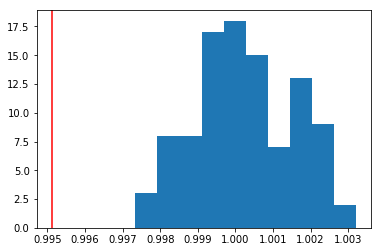

In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt

sampling_replicates = 100
randomization_replicates = 100


#Two identical categories, slightly different sizes
cat_a = list(np.random.normal(100, 10, size=100))
cat_b = list(np.random.normal(100, 10, size=200))



#Calculate ratio of category means when sampling the second (larger category)
ratios = []
for i in range(sampling_replicates):####Get 100 ratios
    ratios.append(np.mean(cat_a)/np.mean(random.sample(cat_b, k=100)))
    
    
    
control_ratio_means = []
for i in range(randomization_replicates):####Repeat 100 times or so to get adistribution of random means
    control_ratios = []
    for j in range(sampling_replicates):####Get 100 ratios
        temp = cat_a + random.sample(cat_b, k=100)
        random.shuffle(temp)
        control_ratios.append(np.mean(temp[:100])/np.mean(temp[100:]))
    control_ratio_means.append(np.mean(control_ratios))
    
    
###Mean is almost always outside of distribution of 100 random means
fig, ax = plt.subplots()
ax.hist(control_ratio_means)
ax.axvline(np.mean(ratios), c='r')

In [ ]:
plt.figure()
plt.violinplot([ratios, control_ratios], showextrema=False, showmeans=True)

plt.figure()
plt.hist(control_ratio_means)
plt.axvline(np.mean(ratios), c='r')